## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cd C:\Users\ravit\Desktop\Data Analyst NanoDegree\Project-1

C:\Users\ravit\Desktop\Data Analyst NanoDegree\Project-1


## Loading the data using pandas and exploring for all columns and the length of the dataset

In [3]:
data = pd.read_csv('titanic-data.csv')
print(data.columns)
print(len(data))
len(data[data['Survived']==0])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
891


549

### As we can see 549/891 people are dead. So the analysis of the data is to be done to determine the survival stats, the data is to be seen for any NaNs or misinterpretations.

### The three questions I will pose based on the nature of the data

In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### As we can see there are some NaNs in the data. NaNs in each column are calculated in the below cell. 

In [5]:
[data[col].isnull().sum() for col in data.columns[:]]

[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]

### The number of NaNs are high for Age and Cabin. But age is a crucial factor is prediction. Hence, filling Age with 0 is a good option. Also, Cabin is beyond repair and should be ignored for any further analysis as lot of it is already missing

In [6]:
data['Cabin'] = data['Cabin'].fillna(0)

In [7]:
data['Age'] = data['Age'].fillna(0)

### The three questions I pose are:
#### 1. What are the chances od survival if Age > 40
#### 2. What are the chances od survival if Embarked = Q
#### 3. What are the chances od survival if Fare>70

Also, lets explore data before we dive-in to answer these questions

In [8]:
data.groupby('Survived')['Pclass'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


We can see people survived have lower class value. Therefore, being in lower classes(1&2) increases survival rate

In [9]:
data.groupby('Survived')['Parch'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.329690,0.823166,0.0,0.0,0.0,0.0,6.0
1,342.0,0.464912,0.771712,0.0,0.0,0.0,1.0,5.0


Also, the parch value is high for people who survived. Hence, having higher parch value increases survival

In [10]:
data.groupby('Survived')['Sex'].describe()

,count,unique,top,freq
Survived,,,,
0,549,2,male,468
1,342,2,female,233


General Data Exploration tells us that out of 342 survivals, 233 were females... 68.12%

In [13]:
data[data['Age']>40].groupby('Survived').describe()

Age                                                     Fare  \
         count       mean       std   min   25%   50%   75%   max count   
Survived                                                                  
0         95.0  51.378947  8.628169  40.5  45.0  49.0  57.0  74.0  95.0   
1         55.0  50.527273  7.373261  41.0  45.0  49.0  54.0  80.0  55.0   

                    ...  Pclass      SibSp                                     \
               mean ...     75%  max count      mean       std  min  25%  50%   
Survived            ...                                                         
0         30.698554 ...     3.0  3.0  95.0  0.242105  0.477489  0.0  0.0  0.0   
1         62.079625 ...     2.0  3.0  55.0  0.454545  0.571489  0.0  0.0  0.0   

                    
          75%  max  
Survived            
0         0.0  2.0  
1         1.0  2.0  

[2 rows x 48 columns]

### Question-1 can be answered using the above cell. We can see 55/150 survived who are >40 = 36.67%

In [11]:
data.groupby(by = ('Embarked','Survived')).describe()

Age                                                      \
                   count       mean        std  min   25%   50%    75%   max   
Embarked Survived                                                              
C        0          75.0  22.893333  20.045100  0.0   0.0  24.0  34.75  71.0   
         1          93.0  24.612043  17.692207  0.0  13.0  24.0  38.00  60.0   
Q        0          47.0  12.904255  19.548890  0.0   0.0   0.0  23.00  70.5   
         1          30.0   6.000000  10.718981  0.0   0.0   0.0  11.25  33.0   
S        0         427.0  24.969555  16.921706  0.0  16.0  25.0  36.00  74.0   
         1         217.0  26.040323  16.043426  0.0  17.0  27.0  36.00  80.0   

                    Fare            ...  Pclass       SibSp            \
                   count       mean ...     75%  max  count      mean   
Embarked Survived                   ...                                 
C        0          75.0  35.443335 ...     3.0  3.0   75.0  0.253333   
         1          93.0  79.720926 ...     3.0  3.0   93.0  0.494624   
Q        0          47.0  13.335904 ...     3.0  3.0   47.0  0.510638   
         1          30.0  13.182227 ...     3.0  3.0   30.0  0.300000   
S        0         427.0  20.743987 ...     3.0  3.0  427.0  0.611241   
         1         217.0  39.547081 ...     3.0  3.0  217.0  0.493088   

                                                      
                        std  min  25%  50%  75%  max  
Embarked Survived                                     
C        0         0.467695  0.0  0.0  0.0  0.0  2.0  
         1         0.601152  0.0  0.0  0.0  1.0  2.0  
Q        0         1.158566  0.0  0.0  0.0  0.0  4.0  
         1         0.595963  0.0  0.0  0.0  0.0  2.0  
S        0         1.390330  0.0  0.0  0.0  1.0  8.0  
         1         0.764489  0.0  0.0  0.0  1.0  4.0  

[6 rows x 48 columns]

### The second question can be answered using this table. As we can see for Q, survival rate = 30/47 = 63.82%

In [14]:
data[data['Fare']>70].groupby('Survived').describe()

Age                                                      Fare  \
         count       mean        std  min   25%   50%    75%   max count   
Survived                                                                   
0         29.0  32.137931  18.376468  0.0  21.0  27.0  46.00  70.0  29.0   
1         76.0  31.972632  16.603979  0.0  21.0  35.0  41.25  63.0  76.0   

                     ...  Pclass      SibSp                                \
                mean ...     75%  max count      mean       std  min  25%   
Survived             ...                                                    
0         125.228445 ...     1.0  2.0  29.0  0.758621  0.830455  0.0  0.0   
1         138.046764 ...     1.0  1.0  76.0  0.618421  0.692187  0.0  0.0   

                         
          50%  75%  max  
Survived                 
0         1.0  1.0  3.0  
1         1.0  1.0  3.0  

[2 rows x 48 columns]

### The third question can be answered using this table. As we can see for Fare>70, survival rate = 76/105 = 72.3%

### The below plots give some histogram plots

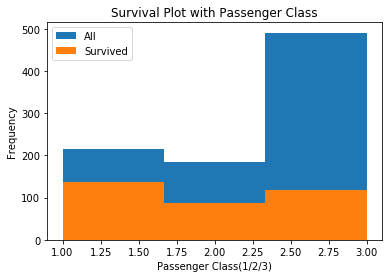

In [15]:
plt.figure()
plt.hist(data['Pclass'],bins=3,label='All')
plt.hist(data[data['Survived']==1]['Pclass'],bins=3,label='Survived')
plt.legend(loc='best')
plt.xlabel('Passenger Class(1/2/3)')
plt.ylabel('Frequency')
plt.title('Survival Plot with Passenger Class')

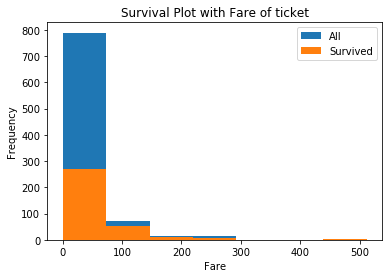

In [16]:
plt.figure()
plt.hist(data['Fare'],bins=7,label='All')
plt.hist(data[data['Survived']==1]['Fare'],bins=7,label='Survived')
plt.legend(loc='best')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Survival Plot with Fare of ticket')

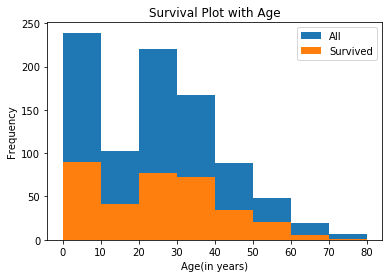

In [17]:
plt.figure()
plt.hist(data['Age'],bins=8,label='All')
plt.hist(data[data['Survived']==1]['Age'],bins=8,label='Survived')
plt.legend(loc='best')
plt.xlabel('Age(in years)')
plt.ylabel('Frequency')
plt.title('Survival Plot with Age')

In [18]:
rn = np.linspace(0,80,9)
age_cut = pd.cut(data['Age'],bins=rn)
age_cat = age_cut.cat.add_categories(0).fillna((0))
data['agebin'] = age_cat
data.groupby('agebin').apply(lambda g: (g.loc[g['Survived'] == 1, :].shape[0]/g.shape[0])*100)

agebin
(0.0, 10.0]     59.375000
(10.0, 20.0]    38.260870
(20.0, 30.0]    36.521739
(30.0, 40.0]    44.516129
(40.0, 50.0]    38.372093
(50.0, 60.0]    40.476190
(60.0, 70.0]    23.529412
(70.0, 80.0]    20.000000
0               29.378531
dtype: float64

#### The above representation is the percentage of people survived in each data bin based on ages. It can be seen that people in group 0-10 had highest survival rate and people in 70-80 had least survival rate

In [20]:
rn = np.linspace(0,515,15)
fare_cut = pd.cut(data['Fare'],bins=rn)
data['farebin'] = fare_cut
data.groupby('farebin').apply(lambda g: ((g.loc[g['Survived'] == 1, :].shape[0]/g.shape[0])*100 if g.shape[0]!=0 \
                                         else (g.loc[g['Survived'] == 1, :].shape[0],g.shape[0])))

farebin
(0.0, 36.786]         32.4561
(36.786, 73.571]      47.3684
(73.571, 110.357]     77.0833
(110.357, 147.143]         85
(147.143, 183.929]    66.6667
(183.929, 220.714]         75
(220.714, 257.5]      57.1429
(257.5, 294.286]      66.6667
(294.286, 331.071]     (0, 0)
(331.071, 367.857]     (0, 0)
(367.857, 404.643]     (0, 0)
(404.643, 441.429]     (0, 0)
(441.429, 478.214]     (0, 0)
(478.214, 515.0]          100
dtype: object

#### The above representation is the percentage of people survived in each data bin based on fares. It can be seen that people with high fares had higher chances of survival

In [22]:
rn = np.linspace(0,3,4)
class_cut = pd.cut(data['Pclass'],bins=rn)
data['classbin'] = class_cut
data.groupby('classbin').apply(lambda g: (g.loc[g['Survived'] == 1, :].shape[0]/g.shape[0])*100)

classbin
(0.0, 1.0]    62.962963
(1.0, 2.0]    47.282609
(2.0, 3.0]    24.236253
dtype: float64

#### The above representation is the percentage of people survived in each data bin based on Class. It can be seen that people with 1st and 2nd class had higher chances of survival